<a href="https://colab.research.google.com/github/Ramki-Rks/Email_campaign-effectiveness-prediction/blob/main/Email_Campaign_Effectiveness_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Project Title: Email Campaign Effectiveness Prediction

#Problem Statement

Most of the small to medium business owners are making effective use of Gmail-based
Email marketing Strategies for offline targeting of converting their prospective customers into
leads so that they stay with them in Business.
The main objective is to create a machine learning model to characterize the mail and track
the mail that is ignored; read; acknowledged by the reader.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 5.3 MB/s 


#Importing Necessary librarys

In [ ]:
#importing library for data manipulation
import pandas as pd
import numpy as np

#importing library for data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})

#VIF library
from statsmodels.stats.outliers_influence import variance_inflation_factor


#train test split library
from sklearn.model_selection import train_test_split

#Hyper parameter tuning library
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

#evaluation matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_auc_score, f1_score, recall_score,roc_curve, classification_report

#importing clssifiers model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
#ensemble library for model explainability
from sklearn import ensemble

#to ignore warnings
import warnings    
warnings.filterwarnings('ignore')

In [ ]:
#loading the dataset
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone Project/Supervised ML-Classification/Copy of data_email_campaign.csv")

In [ ]:
#first five column
df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [ ]:
#checking binary variable present if any
df["Email_Source_Type"].value_counts()

1    37149
2    31204
Name: Email_Source_Type, dtype: int64

In [ ]:
#checking data size
df.shape

(68353, 12)

In [ ]:
#data column
df.columns

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

##Dataset Column Description
In our dataset have 68353 observations and 12 features. Clearly Email_Status is our target variable.

**Our features:**

**Email.id** - It contains the email id's of the customers/individuals

**Email Type** - There are two categories 1 and 2. We can think of them as marketing emails or important updates, notices like emails regarding the business.

**Subject Hotness Score** - It is the email's subject's score on the basis of how good and effective the content is.

**Email Source** - It represents the source of the email like sales and marketing or important admin mails related to the product.

**Email Campaign Type** - The campaign type of the email.

**Total Past Communications** - This column contains the total previous mails from the same source, the number of communications had. 

**Customer Location** - Contains demographical data of the customer, the location where the customer resides.

**Time Email sent Category** - It has three categories 1,2 and 3; the time of the day when the email was sent, we can think of it as morning, evening and night time slots.

**Word Count** - The number of words contained in the email.

**Total links** - Number of links in the email.

**Total Images** - Number of images in the email.

**Email Status** - Our target variable which contains whether the mail was ignored, read, acknowledged by the reader.

##1.**Data Pre-Processing**

In [ ]:
#checking  null counts
df.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

Here in four features have null values present more. in particularly Customer Location column have more than 10000 null value present. we cant drop this column simply. so we should know how it will impact with target variable.remaining variables such as
1. Total_Past_Communications,
2.Total_Links,
3.Total_images 

will treat with either mean / meadian / mode.

In [ ]:
#describe the column to get know the statistics value of all columns
df.describe()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353.000000,68353.000000,68353.000000,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
mean,1.285094,1.095481,1.456513,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,0.451462,0.997578,0.498109,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,1.000000,0.200000,1.000000,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,1.000000,0.800000,1.000000,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,2.000000,1.800000,2.000000,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000
max,2.000000,5.000000,2.000000,3.000000,67.000000,3.000000,1316.000000,49.000000,45.000000,2.000000


**conclusion**

Minimum value is zero in  total past communication and  total images and these are continuous variable. mean value of past communication is not half of the maximum value. similarly toal image feature. so we need to impute some value to replace null column

##Imputing value in the place of null

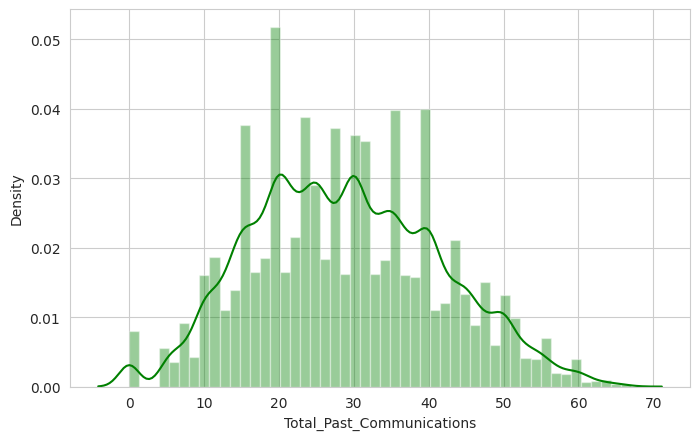

In [ ]:
#checking the distribution of Total_Past_Communications and later will fill with either mean / median to replace null 
sns.set_style('whitegrid')
sns.set_palette("bright")
sns.distplot(df['Total_Past_Communications'], kde = True, color ='green', bins = 50)

**conclusion**

Its normally distributed and we will  replace the null rows in Total past communications by mean of total past communication

In [ ]:
#filling the mean values to replace null 
df["Total_Past_Communications"].fillna(value=df["Total_Past_Communications"].mean(), inplace=True)

In [ ]:
df.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications        0
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

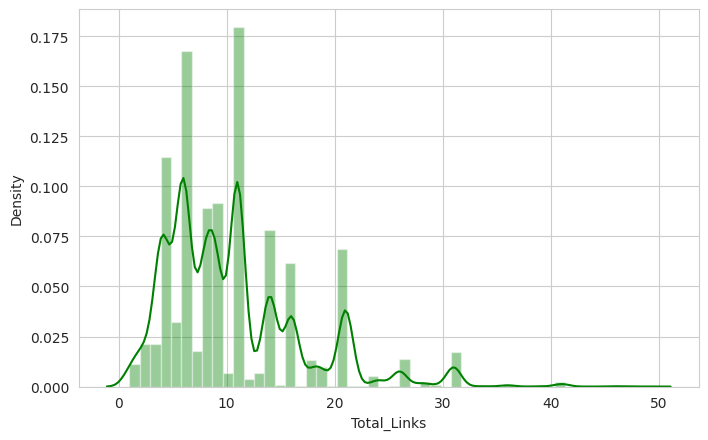

In [ ]:
#plotting the distribution of Total_Links column
sns.set_style('whitegrid')
sns.set_palette("bright")
sns.distplot(df['Total_Links'], kde = True, color ='green', bins = 50)

its positvely skeywed and fill with minimum value i.e., mode to replace the null

In [ ]:
#filling the mean values to replace null 
df["Total_Links"].fillna(value=df["Total_Links"].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications        0
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                      0
Total_Images                  1677
Email_Status                     0
dtype: int64

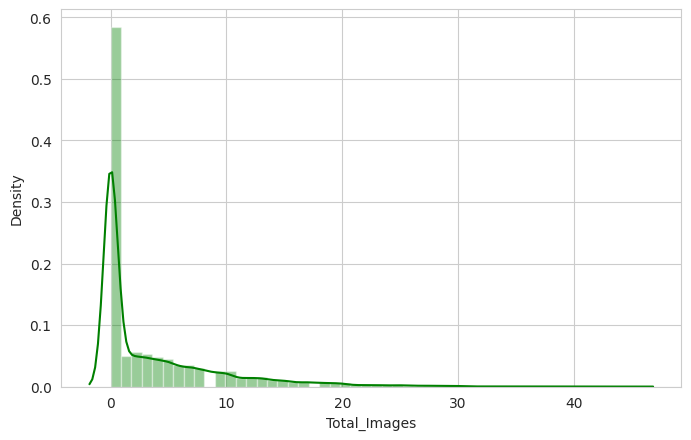

In [ ]:
#plotting the distribution of Total_Images column
sns.set_style('whitegrid')
sns.set_palette("bright")
sns.distplot(df['Total_Images'], kde = True, color ='green', bins = 50)

its also positvely skewed and going to fill with mode to repalce null

In [ ]:
#filling the mean values to replace null 
df["Total_Images"].fillna(value=df["Total_Images"].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications        0
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                      0
Total_Images                     0
Email_Status                     0
dtype: int64

In [ ]:
#check if any duplicates there or not
df.duplicated().sum()

0

##2.**Exploratory Data Analysis**


Data analysis includes exploratory data analysis, which is crucial. In order to make better judgments based on the data, it entails investigating and evaluating the dataset that has been provided to identify patterns, trends, and conclusions. In this section, we'll work to achieve the features that prevent our emails from being ignored.

we will going to plot all feature against target varuiable

Categorical Variable:-

Email Type, Email Source, Email Campaign Type, Time Email sent Category, Customer Location, and Email Status are the six categorical variables we have. Remembering that the Customer Location feature has several null values will help us decide whether to fill them in appropriately or eliminate them after we've examined their impact on our target variable. If a specific location is affecting our target variables and making a difference in whether they are ignored or not, it should be filled out conditionally (on Email Status) row per row.

Continuous Variables:- Our continuous variables include Subject Hotness Score, Total Past Communications, Word Count, Total Links and Total Images.

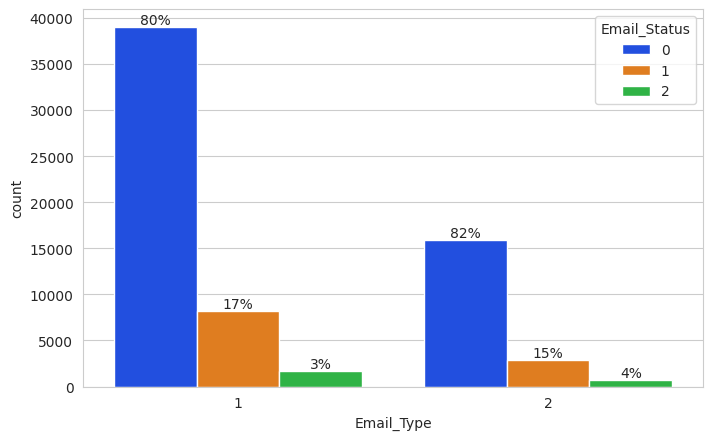

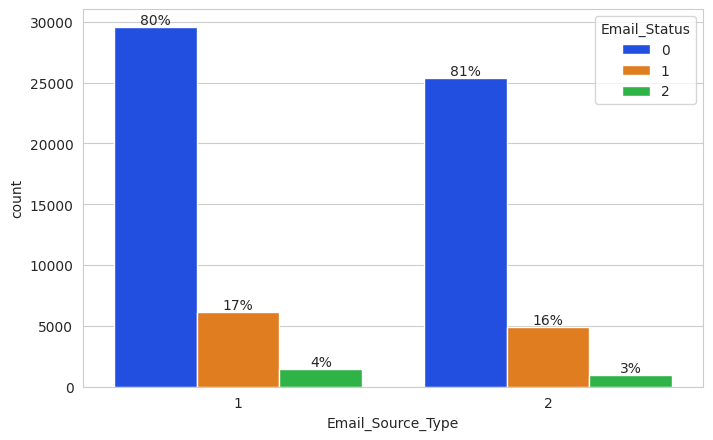

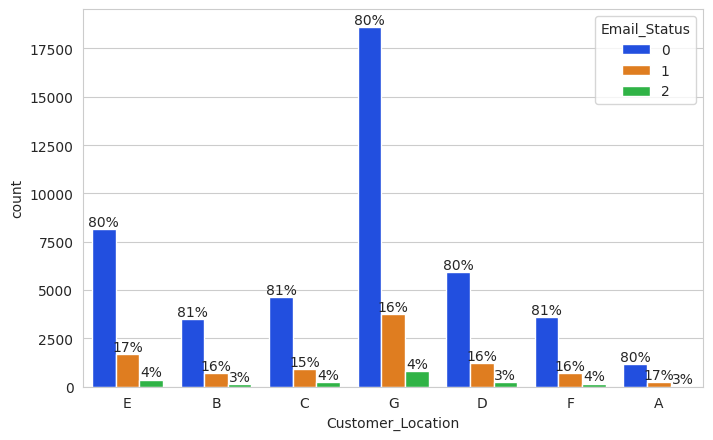

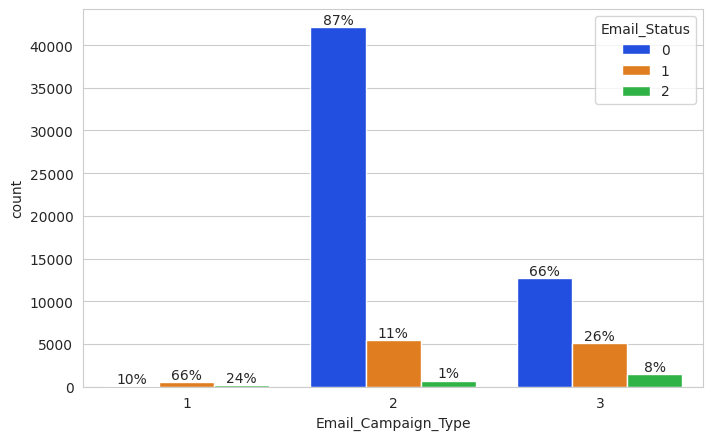

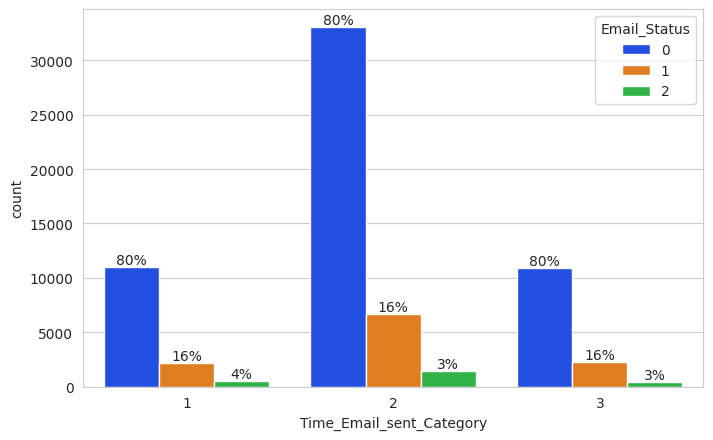

In [ ]:
#starting with categorical variables
categorical_variables = ['Email_Type','Email_Source_Type','Customer_Location','Email_Campaign_Type','Time_Email_sent_Category']
Target_var = ['Email_Status']
#use for loop to plot each categorical variable using enumerate function
for i,value in enumerate(categorical_variables):
  ax = sns.countplot(x=df[value], hue=df[Target_var[0]])
  unique = len([x for x in df[value].unique() if x==x])
  bars = ax.patches
  for i in range(unique):
      catbars=bars[i:][::unique]
      #get height
      total = sum([x.get_height() for x in catbars])
      #print percentage
      for bar in catbars:
        ax.text(bar.get_x()+bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")
  plt.show()

#conclusion drawn
1)most of the Email_Type value is comes under the ignored mail type.

2) most of the ignored mail come from **'G'** Location and at each location more ignored mails is dominent.

3)Email campaign type 2 send most of the mail as ignored mails. but aclnowledged mail received very less from all type of eamil_campaign_type

4)time email sent category also follows same patterns as email_campaign type

5) email source type and email types bothe follows simmilar pattern and nearly same propertion followed in all thype email status

#2.1.Checking the Outlier with help of box plot for continuous variable

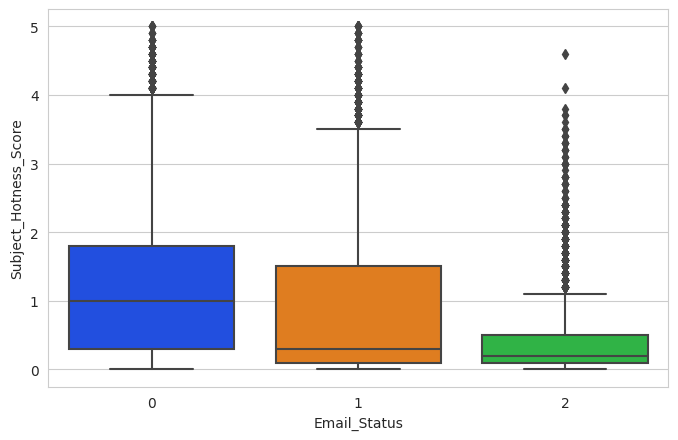

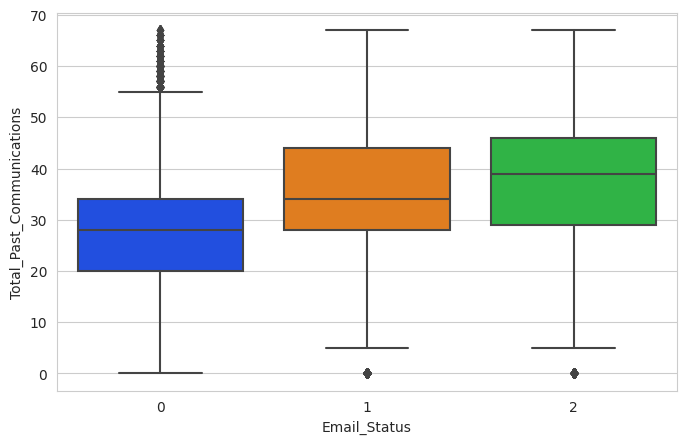

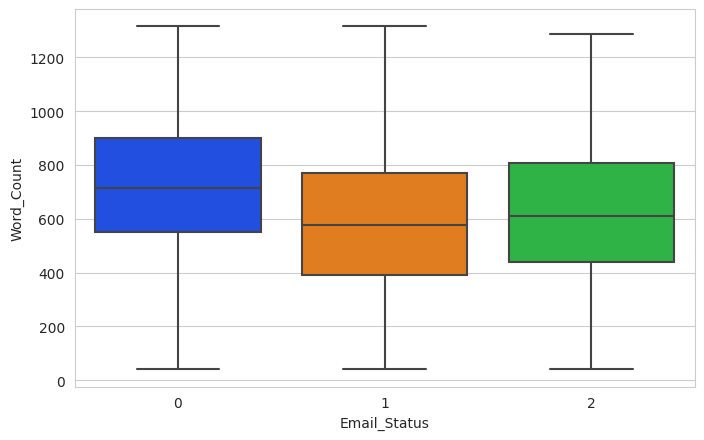

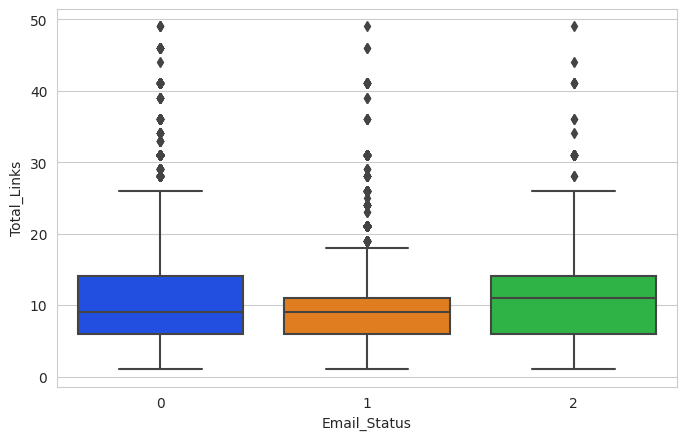

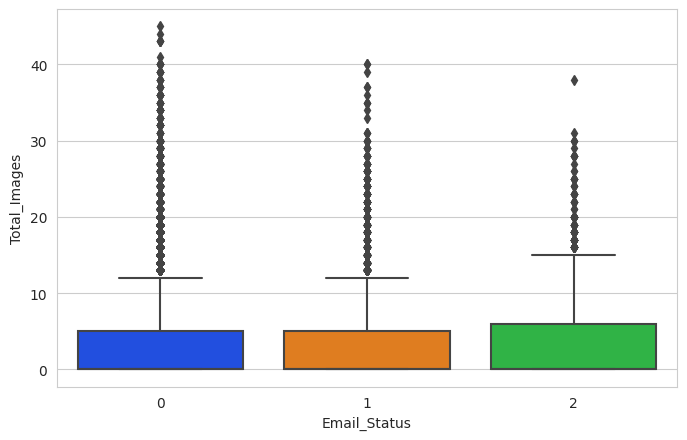

In [ ]:
#continuous variables through boxplots
cont_var = ['Subject_Hotness_Score', 'Total_Past_Communications','Word_Count','Total_Links','Total_Images']
for value in cont_var:
 sns.boxplot(x=df['Email_Status'], y= df[value])
 plt.show()

#Conclusion Drawn
for ignored mails mean  value is 1 with Subject_Hotness_Score. but other two type of mail have more number of outliers present there with low mean value

total past communication have very very less outliers with three type of email status. butmean value of read and acknowledge mail is more than ignored mails

there is no oulierts with word count

total imagea and total links have considerable amount of outliers present there.

**so we will treated the outliers in Subject_Hotness_Score, total_images, total_links**

#2.2.Checking Muliticollinearity

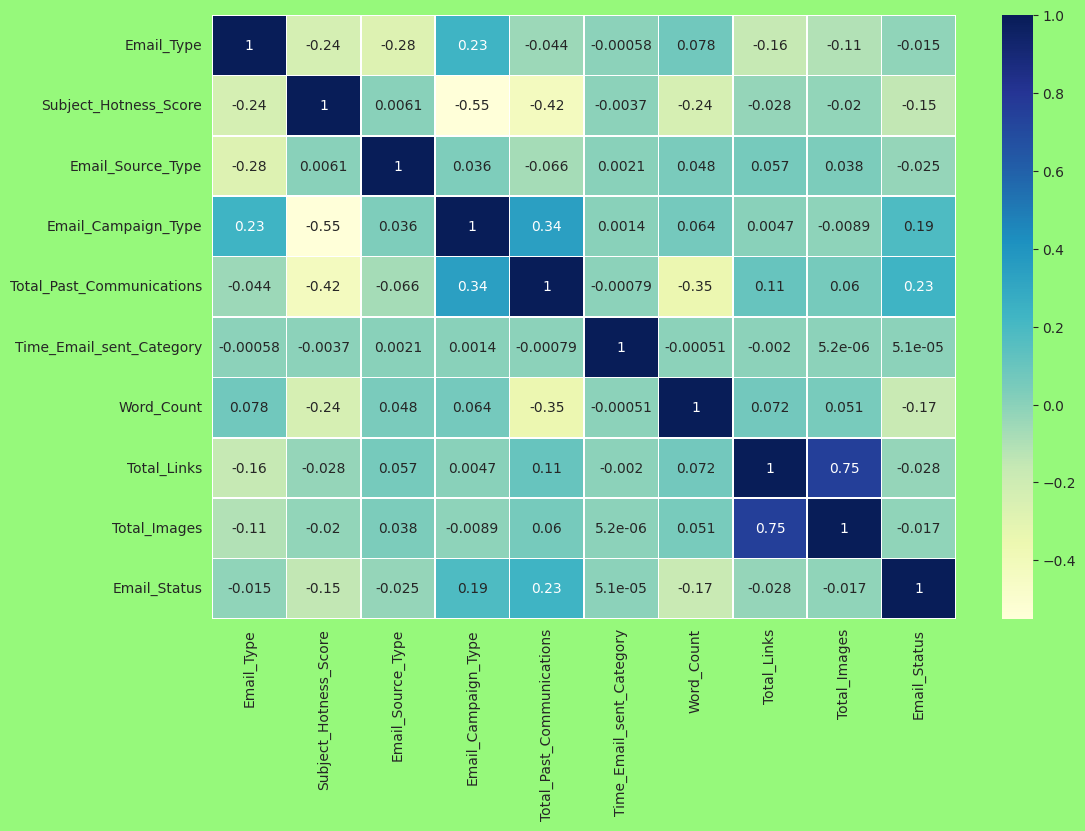

In [ ]:
#plotting  correlation matix using sns heatmap
plt.figure(figsize=(12,8),edgecolor='k',facecolor='xkcd:light green')
sns.heatmap((df.corr()),annot=True,cmap='YlGnBu',linewidths=.5)

##**observation**

1) Emails of type 1, which could be regarded as promotional emails, are sent more frequently than emails of type 2, and as a result, they are read and acknowledged more frequently than emails of type 2. In contrast, both email types have roughly the same percentage of emails that are read, acknowledged, and ignored. Email source type exhibits a somewhat consistent pattern across both groups.

2) We can see from the customer location feature that, regardless of location, the percentage ratio of emails that are ignored, read, and acknowledged is somewhat comparable. It has an indirect impact on our goal variable as well. It would be better to not take into account a person's location when determining whether they read, ignore, or acknowledge our emails. People should not be ignoring emails because of geography; instead, other reasons should be to blame.


3) According to the Email Campaign Type feature, Campaign Type 1 had a very high possibility of being viewed even though relatively few emails were sent. The majority of emails sent under email campaign type 2 were ignored. It appears that campaign 3 was successful because more emails were read and acknowledged even though fewer emails were sent during this campaign.


4) Sending emails in the middle of the day could lead to reading and opening the email because people are typically working at that time and frequently check their emails, but it cannot be considered as the major factor in leading to acknowledged emails. If we consider 1 and 3 as morning and night categories in the time email sent feature, it is obvious to think of 2 as middle of the day and as expected there were more emails sent under 2nd category than either of the others.




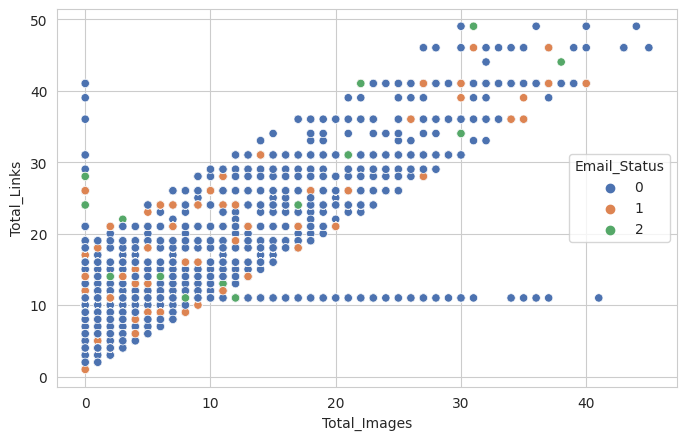

In [ ]:
#scatter plot between images and links, shows a linear relationship
sns.scatterplot(x=df["Total_Images"],y=df["Total_Links"],hue=df['Email_Status'],palette="deep") #it shows the collinearity

both total image and toal link is more correalted each other and mostly these are fall under label 0 categories.

In [ ]:
# merging the two column of Total_Links and Total_Images as single column  and drop unwanted columns
df["Total_Image_Link"]=df["Total_Links"] + df["Total_Images"]
df.drop(["Total_Links","Total_Links","Total_Images","Email_ID"], inplace=True,axis=1)

##checking outliers of newly formed column

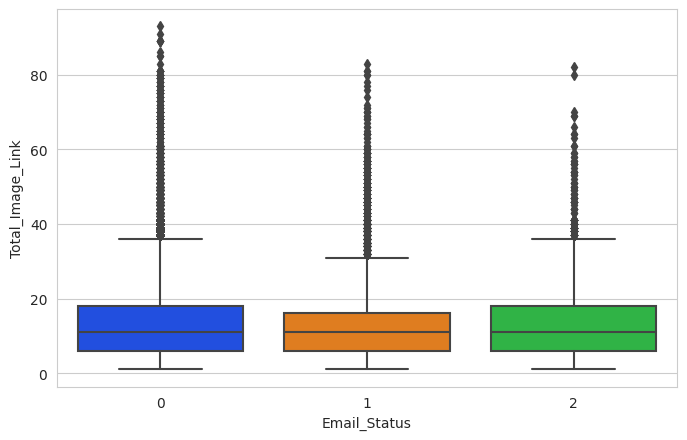

In [ ]:
#checking the outliers of newly formed column of Total_Image_Link
sns.boxplot(y=df["Total_Image_Link"],x=df["Email_Status"])

In [ ]:
#now new column added in the dataset
df.head()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Email_Status,Total_Image_Link
0,1,2.2,2,E,2,33.0,1,440,0,8.0
1,2,2.1,1,NaN,2,15.0,2,504,0,5.0
2,2,0.1,1,B,3,36.0,2,962,1,5.0
3,1,3.0,2,E,2,25.0,2,610,0,16.0
4,1,0.0,2,C,3,18.0,2,947,0,4.0


In [ ]:
#creating the copy for safty side to further operation unless original master dataset will get affect if error  fetch
df1=df.copy()

#from the previous bar cahrt the Customer_Location column contains most of the mail is ignored type   and not balanced by other two type of maill status.better we will drop the Customer_Location column

In [ ]:
#dropping thr customer location which unwanted one
df1.drop(["Customer_Location"],inplace=True, axis=1)

#2.3 Multicollinearity checking

In [ ]:
#checking multicolinarity by using Variation inflation factor[VIF] between each feature. if VIF<= 5 then acceptable. 5<VIF>10 then average. above 10 not acceptable
#Multicollinearity
#VIF code
def vif_calc(df):
  vif = pd.DataFrame()
  vif["variables"] = df.columns
  vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
  return(vif)

In [ ]:
categorical_variables

['Email_Type',
 'Email_Source_Type',
 'Customer_Location',
 'Email_Campaign_Type',
 'Time_Email_sent_Category']

In [ ]:
#let's get VIF scores
vif_df = vif_calc(df1[[i for i in df1.describe().columns if i not in categorical_variables + ['Email_Status']]])
vif_df

,variables,VIF
0,Subject_Hotness_Score,1.734531
1,Total_Past_Communications,3.430879
2,Word_Count,3.687067
3,Total_Image_Link,2.629047


these four column have VIF<5 and its accapetable. so we accept these continuous variable column for modeling

#2.4 Outliers Treatment

With the aid of box plots, we previously observed that, aside from Word Count, all of our other continuous variables have outliers; however, deleting them would result in information loss because our target variable is highly imbalanced, so we must be careful not to remove more than 5% of information or data pertaining to the minority class.

In [ ]:
#setting the continuous variable as outlier_treatment_variable
outlier_treatment_variable=["Total_Image_Link",'Subject_Hotness_Score', 'Total_Past_Communications']

In [ ]:
#the number of outliers in different features acc to email_status
outliers = {}
for elem in outlier_treatment_variable:
  q_75, q_25 = np.percentile(df1.loc[:,elem],[75,25])
  IQR = q_75-q_25
  max = q_75+(1.5*IQR)
  min = q_25-(1.5*IQR)
  outlier_list=[]
  outlier_list=df.loc[df1[elem] < min]['Email_Status'].tolist()
  outlier_list.append(df1.loc[df1[elem] > max]['Email_Status'].tolist()) 
  outliers[elem]={}
  for i in outlier_list[0]:
      outliers[elem][i] = outliers[elem].get(i,0) + 1
print(outliers)

{'Total_Image_Link': {0: 3061, 1: 437, 2: 122}, 'Subject_Hotness_Score': {0: 170, 1: 76, 2: 1}, 'Total_Past_Communications': {1: 56, 0: 67, 2: 13}}


**Observation**

In the continuous variable most pf the outliers comes under class label 0 and no.of its outlier 3298.we will use quantie based treatment for label 0 and capping method for label 1 and 2. we will treate minority class as label 1 and 2 and majority class as label 0

In [ ]:
df1['Email_Status'].value_counts()

0    54941
1    11039
2     2373
Name: Email_Status, dtype: int64

In [ ]:
#percentage of outliers in minority class
minority_outliers = 0  
majority_outliers = 0
for col in outlier_treatment_variable:
  minority_outliers += outliers[col][1]
  minority_outliers += outliers[col][2]
  majority_outliers += outliers[col][0]

total_min = df1['Email_Status'].value_counts()[1] + df1['Email_Status'].value_counts()[2]
total_maj = df1['Email_Status'].value_counts()[0]

min_per = (minority_outliers/total_min)*100   #number of outliers in minority classes by total number minority classes
maj_per = (majority_outliers/total_maj)*100  #number of outliers in majority class by total number of majority class
total_out = ((minority_outliers+majority_outliers)/(total_min+total_maj))*100
print(f'The percentage of outliers in minority classes is {min_per}')
print(f'The percentage of outliers in majority class is {maj_per}')
print(f'The percentage of total outliers are {total_out}')

The percentage of outliers in minority classes is 5.256486728303012
The percentage of outliers in majority class is 6.002803006861907
The percentage of total outliers are 5.856363290565154


#out of 6% of majority outliers we will remove only 5% of outliers by quantile method

#droping the outliers based on **quantile** method for email status equal to 0 and using the **capping method** setting as maximum value for value which is more than maximum value and similarly for minimum value for rest of two type email status

#**2.4.1 Quantile method**

In [ ]:
#dropping few row whcih quantile based for email status equal 0
for elem in outlier_treatment_variable:
  q_low = df1[elem].quantile(0.01)
  q_hi  = df1[elem].quantile(0.99)
  df1 = df1.drop(df1[(df1[elem] > q_hi) &  (df1['Email_Status']==0)].index)
  df1 = df1.drop(df1[(df1[elem] < q_low) & (df1['Email_Status']==0)].index)

In [ ]:
df1.head()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Email_Status,Total_Image_Link
0,1,2.2,2,2,33.0,1,440,0,8.0
1,2,2.1,1,2,15.0,2,504,0,5.0
2,2,0.1,1,3,36.0,2,962,1,5.0
3,1,3.0,2,2,25.0,2,610,0,16.0
4,1,0.0,2,3,18.0,2,947,0,4.0


In [ ]:
#checking the shape just
df1.shape

(66921, 9)

#**2.4.2capping method**

In [ ]:
#spliting the dataset based different type of email status
email_status_0=df1.loc[df1['Email_Status'] == 0]
email_status_1=df1.loc[df1['Email_Status'] == 1]  
email_status_2=df1.loc[df1['Email_Status'] == 2]

In [ ]:
#creating the funtion for outlier treatment by capping method
def outlier_treatment (x):
  for elem in x:
    #code for email stai=tus =1
    q_75_1, q_25_1 = np.percentile(email_status_1.loc[:,elem],[75,25])
    IQR1 = q_75_1-q_25_1
    max1 = q_75_1+(1.5*IQR1)
    min1 = q_25_1-(1.5*IQR1)
    #capping methodd for email status =1
    email_status_1[elem] = np.where(email_status_1[elem]>max1,max1,np.where(email_status_1[elem]<min1, min1,email_status_1[elem]))
    #code for email status equal to 2 
    q_75_2, q_25_2 = np.percentile(email_status_2.loc[:,elem],[75,25])
    IQR2 = q_75_2-q_25_2
    max2 = q_75_2+(1.5*IQR2)
    min2 = q_25_2-(1.5*IQR2)
    #capping method for email status=2
    email_status_2[elem] = np.where(email_status_2[elem]>max2,max2,np.where(email_status_2[elem]<min2, min2,email_status_2[elem]))
  # concat the all dataset whcih is splitted early
  frames = [email_status_0, email_status_1, email_status_2]
  df3=pd.concat(frames)
  return df3

In [ ]:
#calling the outliers treatment function
final_df=outlier_treatment(outlier_treatment_variable)
final_df

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Email_Status,Total_Image_Link
0,1,2.2,2,2,33.00000,1,440,0,8.0
1,2,2.1,1,2,15.00000,2,504,0,5.0
3,1,3.0,2,2,25.00000,2,610,0,16.0
4,1,0.0,2,3,18.00000,2,947,0,4.0
5,1,1.5,1,2,28.93325,2,416,0,11.0
...,...,...,...,...,...,...,...,...,...
68227,1,0.2,1,3,34.00000,2,1082,2,16.0
68255,1,0.3,2,3,46.00000,3,655,2,36.0
68304,1,0.0,1,3,20.00000,2,922,2,15.0
68318,1,0.3,1,3,49.00000,2,440,2,19.0


Now our column have no outlier except email status =0 type rows only

In [ ]:
#suffling the rows beacuse its orederly arranged. so use sample attributes to suffle the rows
final_df = final_df.sample(frac = 1)

In [ ]:
#reset the index
final_df.reset_index(inplace=True)

In [ ]:
final_df

,index,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Email_Status,Total_Image_Link
0,52503,1,0.6,2,2,50.00000,1,462,1,8.0
1,4013,2,0.1,1,2,42.00000,2,988,0,9.0
2,30727,1,1.1,2,2,7.00000,2,966,0,8.0
3,31755,2,1.1,1,2,29.00000,2,796,0,27.0
4,25284,2,1.3,1,2,28.93325,3,608,1,8.0
...,...,...,...,...,...,...,...,...,...,...
66916,56267,1,0.3,1,2,28.93325,2,868,0,19.0
66917,56710,1,0.8,1,2,29.00000,2,827,0,11.0
66918,41047,2,0.1,2,3,19.00000,1,1157,0,24.0
66919,46495,1,0.6,2,2,19.00000,2,1271,0,15.0


In [ ]:
final_df.columns

Index(['index', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Email_Status',
       'Total_Image_Link'],
      dtype='object')

In [ ]:
#dropping the index colum which is unwanted ine
final_df.drop("index",inplace=True,axis=1)

In [ ]:
#just checking the shape
final_df.shape

(66921, 9)

#cross checking if any outlier present in class 1 and 2 by plotting box plot

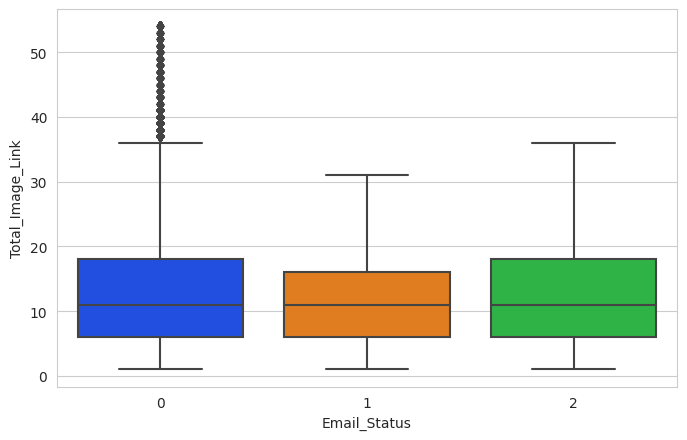

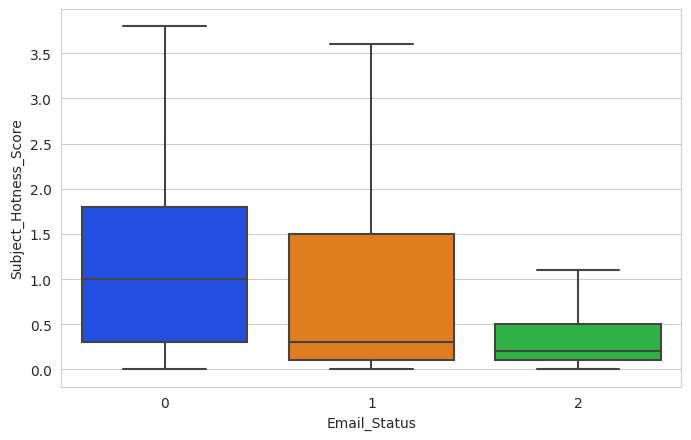

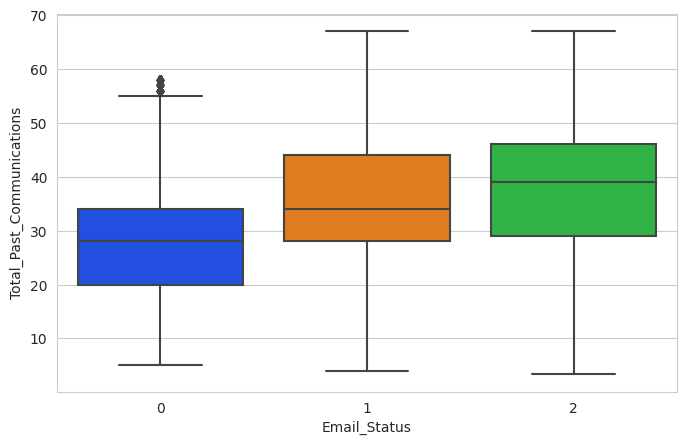

In [ ]:
#lets check outlier if any present after capping and quantile amthid treatment for outliers with help of box plot
outlier_treatment_variable=["Total_Image_Link",'Subject_Hotness_Score', 'Total_Past_Communications']
for value in outlier_treatment_variable:
 sns.boxplot(x=final_df['Email_Status'], y= final_df[value])
 plt.show()

#There is no outliers present in our continuous variable for email status = 1 and 2

In [ ]:
#creating the list for normalixzation treatment of continuous variable
zscore_variable = ['Subject_Hotness_Score', 'Total_Past_Communications','Word_Count','Total_Image_Link']

In [ ]:
df2=final_df.copy()

In [ ]:
#feature scaling of numerical variables
for elem in zscore_variable:
  final_df[elem] = (final_df[elem] - final_df[elem].mean()) / (final_df[elem].std())

final_df.head(1)

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Email_Status,Total_Image_Link
0,1,-0.491775,2,2,1.810725,1,-0.898762,1,-0.551839


In [ ]:
categorical_variables.remove('Customer_Location')

In [ ]:
categorical_variables

['Email_Type',
 'Email_Source_Type',
 'Email_Campaign_Type',
 'Time_Email_sent_Category']

#2.5 one hot coding for categorical column and drop any one colum if binary variable present any column

In [ ]:
#creating dummy variables for categorical_variables
final_df = pd.get_dummies(final_df,columns=categorical_variables)
# as some features had binary categories, we are going to delete one of them to keep it binary encoded and have less columns
final_df.drop('Email_Type_2',axis=1,inplace=True)
final_df.drop('Email_Source_Type_2',axis=1,inplace=True)
final_df.head(1)

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Email_Status,Total_Image_Link,Email_Type_1,Email_Source_Type_1,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Time_Email_sent_Category_1,Time_Email_sent_Category_2,Time_Email_sent_Category_3
0,-0.491775,1.810725,-0.898762,1,-0.551839,1,0,0,1,0,1,0,0


In [ ]:
#Email_Status should be the last col
columns=list(final_df.columns)
columns.remove('Email_Status')
columns.append('Email_Status')
final_df=final_df[columns]
final_df.head(3)

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Total_Image_Link,Email_Type_1,Email_Source_Type_1,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Time_Email_sent_Category_1,Time_Email_sent_Category_2,Time_Email_sent_Category_3,Email_Status
0,-0.491775,1.810725,-0.898762,-0.551839,1,0,0,1,0,1,0,0,1
1,-1.014199,1.122173,1.053610,-0.449984,0,1,0,1,0,0,1,0,0
2,0.030650,-1.890238,0.971952,-0.551839,1,0,0,1,0,0,1,0,0


In [ ]:
final_df.shape

(66921, 13)

#3 Handling Data Imbalance

Resampling is a commonly used method for coping with excessively imbalanced datasets. It entails undersampling (removing samples from the majority class) and/or boosting the number of examples from the minority class (over-sampling).

**3.1 setting target and  feature variable from our final dataset**

In [ ]:
#setting the target variable(Y) and features variable(X)
X = final_df.drop('Email_Status',axis=1)
Y = final_df['Email_Status']
print(f'Shape of the Feature Variable(X): {X.shape}')
print(f'Shape of  the Target Variable(Y): {Y.shape}')

Shape of the Feature Variable(X): (66921, 12)
Shape of  the Target Variable(Y): (66921,)


In [ ]:
#feature variable
X.head()

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Total_Image_Link,Email_Type_1,Email_Source_Type_1,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Time_Email_sent_Category_1,Time_Email_sent_Category_2,Time_Email_sent_Category_3
0,-0.491775,1.810725,-0.898762,-0.551839,1,0,0,1,0,1,0,0
1,-1.014199,1.122173,1.053610,-0.449984,0,1,0,1,0,0,1,0
2,0.030650,-1.890238,0.971952,-0.551839,1,0,0,1,0,0,1,0
3,0.030650,0.003278,0.340957,1.383414,0,1,0,1,0,0,1,0
4,0.239620,-0.002467,-0.356849,-0.551839,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
66916,-0.805229,-0.002467,0.608202,0.568571,1,1,0,1,0,0,1,0
66917,-0.282805,0.003278,0.456021,-0.246273,1,1,0,1,0,0,1,0
66918,-1.014199,-0.857411,1.680893,1.077848,0,0,0,0,1,1,0,0
66919,-0.491775,-0.857411,2.104030,0.161149,1,0,0,1,0,0,1,0


##3.2 **Splitting the dataset into test and train**

In [ ]:
#splitting the dataset into train and test
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20, random_state=42, stratify=Y)

In [ ]:
Y_train.value_counts()

0    42807
1     8831
2     1898
Name: Email_Status, dtype: int64

In [ ]:
Y_test.value_counts()

0    10702
1     2208
2      475
Name: Email_Status, dtype: int64

#checking the data imbalance of target variable by visually 

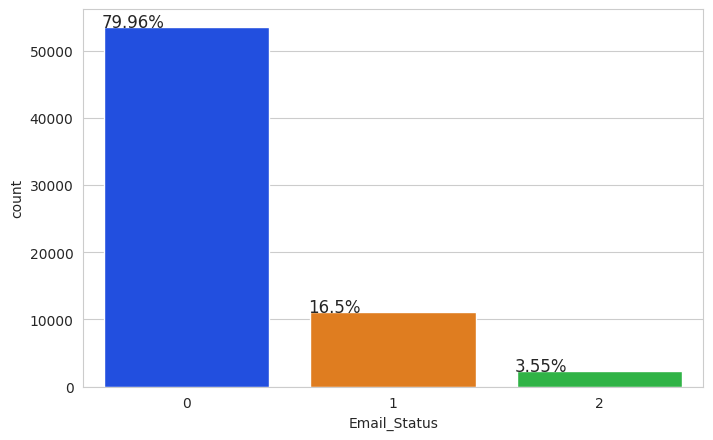

In [ ]:

#using count plot to visualizing our imbalanced dataset of target variable
ax = sns.countplot(x=final_df['Email_Status'])
totals = []
for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x() - .01, i.get_height() + .5, \
          str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)
plt.show()

**Observation**

above bar chart class 0 have more percentage(80%) and remaining class are very less amount. so our final dataset is imbalanced condition.
**Decision:**
We will use SMOTE after checking the outcomes for the various models 

Synthetic Minority Oversampling Technique (SMOTE) selects a point at random from the minority class and calculates its k-nearest neighbours. Between the selected point and its neighbours, the synthetic points are inserted.

##3.3 SMOTE

In [ ]:
#SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()

# fit predictor and target variable
x_train_smote, y_train_smote = smote.fit_resample(X_train, Y_train)
print('Original dataset shape', len(Y_train))
print('Resampled dataset shape', len(y_train_smote))

Original dataset shape 53536
Resampled dataset shape 128421


#Let cross check once again using bar plot against train variable

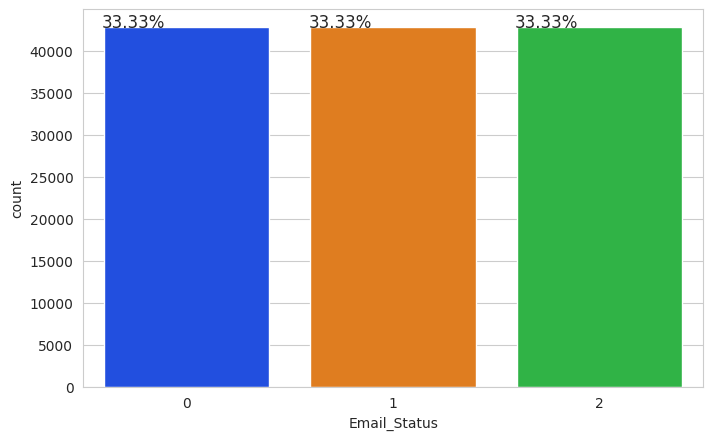

In [ ]:
#using count plot to check our balanced dataset of smote target variable
ax = sns.countplot(x=y_train_smote)
totals = []
for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x() - .01, i.get_height() + .5, \
          str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)
plt.show()

#Now our train set is well balanced. let start classifiers models

##4. **Model Creation**

In this project we will going to implement four type of classifier model


1.   **Logistic Classifier**
2.   **Decision Tree**
3.   **Random Forest**
4.   **XGBoost** 










Hyper Parameter Tuning method

for the above model we will tuning three types such as

1.  **GridSearchCV**
2.  **RandomSearchCV**
3.  **BayesSearchCV** 

#Creating the function for fit the model, Evaluation matrix, feature importance.

In [ ]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Train_Accuracy','Test_Accuracy', 'Train_Recall', 'Test_Recall', 'Train_Precision','Test_Precision', 'Train_F1score','Test_F1score', 'Train_AUC' , 'Test_AUC']

In [ ]:
#Function to evaluate the model

def classification_model_evaluation(model_name, model_var, x_train, y_train, X_test, y_test):
  ''' This function predicts and evaluates various models for clasification for SMOTE algorithms, visualizes results 
      and creates a dataframe that compares the various models.'''

  #Making predictions smote
  y_pred_train = model_var.predict(x_train_smote)
  y_pred_test = model_var.predict(X_test)
  #probs
  train_proba = model_var.predict_proba(x_train_smote)
  test_proba = model_var.predict_proba(X_test)

  #Evaluation 

  #Accuracy SMOTE
  accuracy_train = accuracy_score(y_train_smote,y_pred_train)
  accuracy_test = accuracy_score(y_test,y_pred_test)


  #Confusion Matrix SMOTE
  cm_smote_train = confusion_matrix(y_train_smote,y_pred_train)
  cm_smote_test = confusion_matrix(y_test,y_pred_test)


  #Recall SMOTE
  train_recall = recall_score(y_train_smote,y_pred_train, average='weighted')
  test_recall = recall_score(y_test,y_pred_test, average='weighted')


  #Precision SMOTE
  train_precision = precision_score(y_train_smote,y_pred_train, average='weighted')
  test_precision  = precision_score(y_test,y_pred_test, average='weighted')


  #F1 Score SMOTE
  train_f1 = f1_score(y_train_smote,y_pred_train, average='weighted')
  test_f1 = f1_score(y_test,y_pred_test, average='weighted')

  #ROC-AUC SMOTE
  train_auc = roc_auc_score(y_train_smote,train_proba,average='weighted',multi_class = 'ovr')
  test_auc = roc_auc_score(y_test,test_proba,average='weighted',multi_class = 'ovr')


  print('-------------------------Multiclass ROC curve of '+ str(model_name)+'---------------------------------------')
  #create ROC curve
  fpr = {}
  tpr = {}
  thresh ={}
  no_of_class=3
  for i in range(no_of_class):    
      fpr[i], tpr[i], thresh[i] = metrics.roc_curve(y_test, test_proba[:,i], pos_label=i)
  plt.plot(fpr[0], tpr[0], linestyle='--',color='blue', label='Class 0 vs AUC='+str(test_auc.round(3)))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs AUC='+str(test_auc.round(3)))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='red', label='Class 2 vs AUC='+str(test_auc.round(3)))
  plt.title('Multiclass ROC curve of '+ str(model_name))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.show()

  #Visualising Results SMOTE
  print("----- ---------------------Evaluation  data of " + str(model_name) + '--------------------------------------------')
  print("---------------Test data ---------------\n")
  print("Confusion matrix \n")
  print(cm_smote_test)
  print("Classification Report \n")
  print(classification_report(y_test,y_pred_test))

  #Saving our results
  global comparison_columns

  metric_scores = [model_name,accuracy_train,accuracy_test,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1,train_auc,test_auc]
  final_dict_smote = dict(zip(comparison_columns,metric_scores))

  dict_list = pd.DataFrame(data=final_dict_smote,index=[0])
  return dict_list


#creating models Compariosion function

In [ ]:
#create function to compare all model 
def comparison_list(dict_):
  comarision_df=pd.concat(dict_, ignore_index=True)
  return comarision_df

#creating important feature function

In [ ]:
#Creating function for getting important feature
def imporant_feature(model_name,model_title, X_train):
  #feature importance by random forest 
  imp_features= pd.DataFrame({"Variable": x_train_smote.columns,"Importance": model_name.feature_importances_})
  imp_features.sort_values(by="Importance", ascending=False, inplace = True)
  #visualisation of features with help of sns plot
  sns.barplot(x=imp_features['Importance'],y= imp_features['Variable']).set(title=model_title)

In [ ]:
#model object creation 
lr = LogisticRegression(class_weight='balanced',multi_class='multinomial', solver='lbfgs')
dt=DecisionTreeClassifier()
rf = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=100, oob_score=True)
xgb = XGBClassifier(n_estimators=100,max_depth=12,min_samples_leaf=20,min_samples_split=30)

##**4.1. Logestic Regression**

In [ ]:
#fitting the model
lr.fit(x_train_smote, y_train_smote)

LogisticRegression(class_weight='balanced', multi_class='multinomial')

-------------------------Multiclass ROC curve of Logistic Regression---------------------------------------


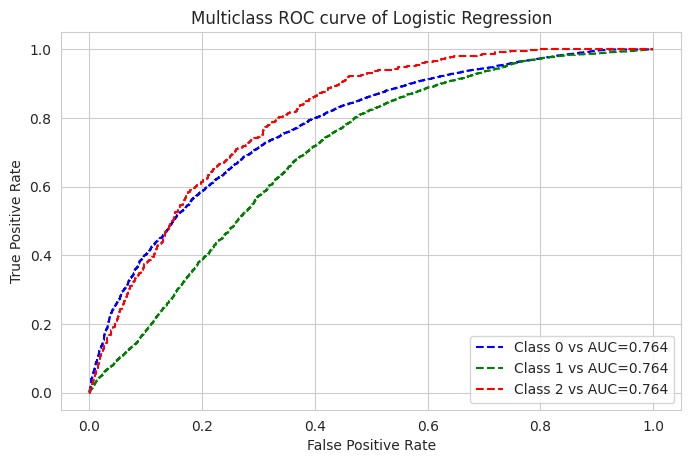

----- ---------------------Evaluation  data of Logistic Regression--------------------------------------------
---------------Test data ---------------

Confusion matrix 

[[7077 1412 2213]
 [ 611  493 1104]
 [ 102   44  329]]
Classification Report 

              precision    recall  f1-score   support

           0       0.91      0.66      0.77     10702
           1       0.25      0.22      0.24      2208
           2       0.09      0.69      0.16       475

    accuracy                           0.59     13385
   macro avg       0.42      0.53      0.39     13385
weighted avg       0.77      0.59      0.66     13385



,Model_Name,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1score,Test_F1score,Train_AUC,Test_AUC
0,Logistic Regression,0.532421,0.590138,0.532421,0.590138,0.527787,0.7713,0.507812,0.65678,0.730397,0.763549


In [ ]:
#Let's evaluate logistic reg
logistic_reg_result = classification_model_evaluation('Logistic Regression', lr,  x_train_smote, y_train_smote, X_test, Y_test)
logistic_reg_result

##**conclusion**

both test and train F1 score is not much good in this logistic regression. let try some other models and will see

##**4.2. Decision Tree**

In [ ]:
#fitting the model
dt.fit(x_train_smote,y_train_smote)

DecisionTreeClassifier()

-------------------------Multiclass ROC curve of Decision Tree---------------------------------------


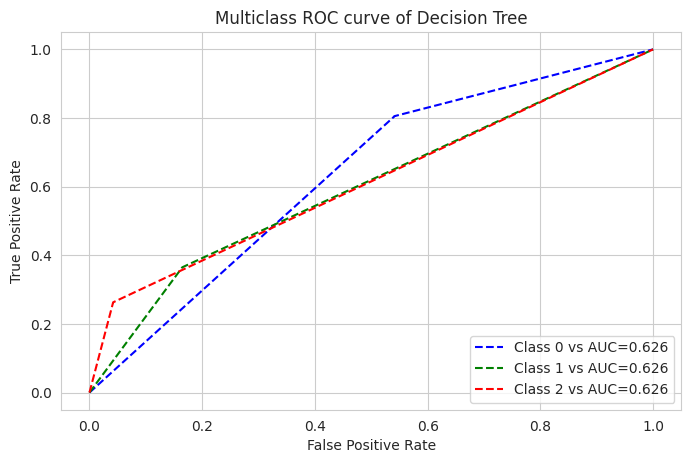

----- ---------------------Evaluation  data of Decision Tree--------------------------------------------
---------------Test data ---------------

Confusion matrix 

[[8618 1702  382]
 [1240  807  161]
 [ 211  139  125]]
Classification Report 

              precision    recall  f1-score   support

           0       0.86      0.81      0.83     10702
           1       0.30      0.37      0.33      2208
           2       0.19      0.26      0.22       475

    accuracy                           0.71     13385
   macro avg       0.45      0.48      0.46     13385
weighted avg       0.74      0.71      0.73     13385



,Model_Name,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1score,Test_F1score,Train_AUC,Test_AUC
0,Decision Tree,0.999525,0.713485,0.999525,0.713485,0.999525,0.741246,0.999525,0.726067,1.0,0.626004


In [ ]:
#calling the mdoel evaluation function for Decision Tree model
decision_tree_result = classification_model_evaluation('Decision Tree', dt,  x_train_smote, y_train_smote, X_test, Y_test)
decision_tree_result

##**observation:**

in decision tree our training set is overfitting and F1 score nearly 1. so we cant take into account as its good model.

##**4.3.Random Forest Classification**

To prevent overfitting, we will be building random forest model. Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction. The ensemble models with only one tree will overfit to data as well because it is the same as a single decision tree. When we add trees to the Random Forest then the tendency to overfitting decreases.

In [ ]:
#fitting the model
rf.fit(x_train_smote,y_train_smote)

RandomForestClassifier(max_depth=5, oob_score=True, random_state=42)

-------------------------Multiclass ROC curve of Random Forest Classification---------------------------------------


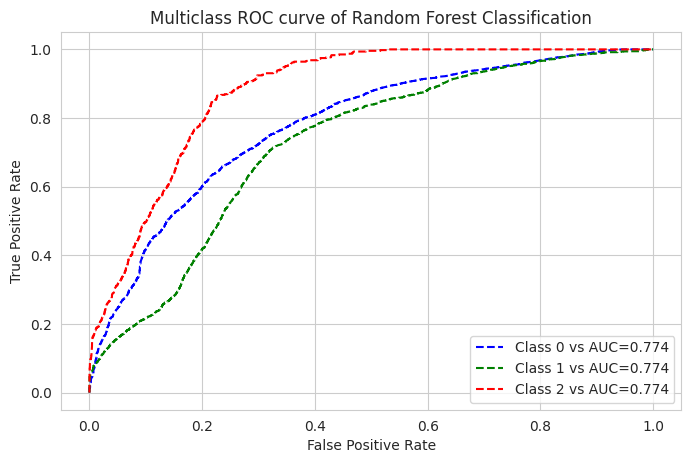

----- ---------------------Evaluation  data of Random Forest Classification--------------------------------------------
---------------Test data ---------------

Confusion matrix 

[[7839  803 2060]
 [ 701  434 1073]
 [  71    5  399]]
Classification Report 

              precision    recall  f1-score   support

           0       0.91      0.73      0.81     10702
           1       0.35      0.20      0.25      2208
           2       0.11      0.84      0.20       475

    accuracy                           0.65     13385
   macro avg       0.46      0.59      0.42     13385
weighted avg       0.79      0.65      0.70     13385



,Model_Name,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1score,Test_F1score,Train_AUC,Test_AUC
0,Random Forest Classification,0.612844,0.647889,0.612844,0.647889,0.650603,0.789522,0.573941,0.697635,0.813269,0.774087


In [ ]:
#calling the mdoel evaluation function for Random Forest Classification model
random_forest_result = classification_model_evaluation('Random Forest Classification', rf,  x_train_smote, y_train_smote, X_test, Y_test)
random_forest_result

##**Conclusion**

the test F1score is more than train dataset but its gives good performance than previous two models

##important Feature of Random forest

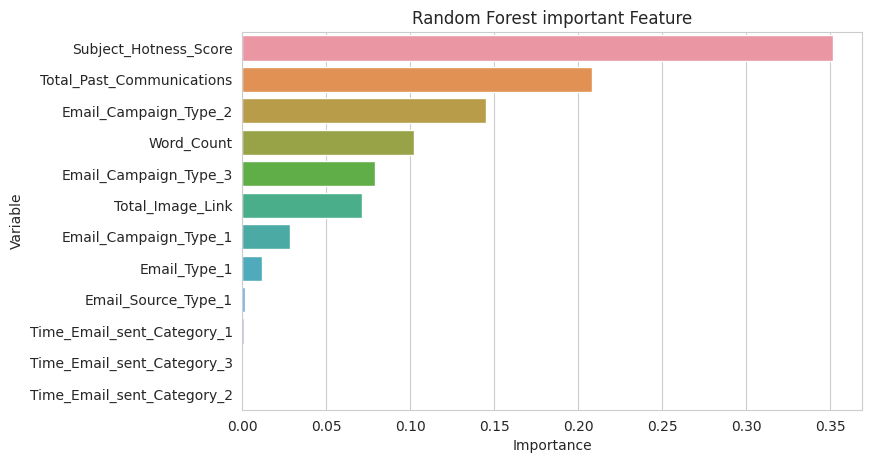

In [ ]:
#calling important feature function for random forest
imporant_feature(rf,"Random Forest important Feature", x_train_smote)

##**observation**
in the random forest model gives subject hotness score and total past communication as very important feature. but time email sent categories 1,2,and 3 are showing as not importan. so we need some attention to this feature. let se what result will come in tunned random forest model

##**4.4. Tuned Hyperparameter Random forest classifier**

#Hyperparameter Setting for random forest and xgboost

In [ ]:
#param_grid  hyper parameter tuning for random forest 
params = {'max_depth': [3,5,10,20],'min_samples_leaf': [5,10,20,50,100],'n_estimators': [10,25,30,50,100,200]}

#param_grid  hyper parameter tuning for XGB
param_dict_xgb = {
    'max_depth': range(2, 14, 4),
    'n_estimators': range(60, 180, 40),
    'learning_rate': [0.1, 0.05, 0.01, 0.005]
  }


#4.4.1. GridSearachCv

In [ ]:
#Grid Search to get the best parameters
rf_grid = GridSearchCV(estimator=rf, param_grid=params, cv = 5, n_jobs=-1, verbose=1, scoring="f1_weighted")
#Fitting RUS to grid search
rf_grid.fit(x_train_smote,y_train_smote)
print('Train ROC-AUC score : ', rf_grid.best_estimator_.score(x_train_smote,y_train_smote))
print('Test ROC-AUC score : ', rf_grid.best_estimator_.score(X_test,Y_test))

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Train ROC-AUC score :  0.8971741381861222
Test ROC-AUC score :  0.7477026522226373


In [ ]:
#optimal model
rf_grid_model = rf_grid.best_estimator_
rf_grid_model

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=200,
                       oob_score=True, random_state=42)

#4.4.2 RandomSearchCV

In [ ]:
#Random Search to get the best parameters
rf_rand=RandomizedSearchCV(estimator=rf, param_distributions=params, cv = 5, n_jobs=-1, verbose=1, scoring="f1_weighted")
#Fitting RUS to random search
rf_rand.fit(x_train_smote,y_train_smote)
print('Train ROC-AUC score : ', rf_rand.best_estimator_.score(x_train_smote,y_train_smote))
print('Test ROC-AUC score : ', rf_rand.best_estimator_.score(X_test,Y_test))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Train ROC-AUC score :  0.7635355588260487
Test ROC-AUC score :  0.7130369816959283


In [ ]:
#optimal model
rf_rand_model = rf_rand.best_estimator_

#4.4.3 BayesSearchCV

In [ ]:
# Bayessearchcf to get the best parameter
rf_bayes = BayesSearchCV(estimator=rf,
                       search_spaces = {
                          'max_depth': Integer(4,8),
                          'min_samples_leaf': Integer(10,100),
                          'min_samples_split': Integer(50,150),
                          'n_estimators': Integer(10,100)
                        },
                       cv = 5, verbose=2, scoring='f1_weighted')
#fir the trainig dataset
rf_bayes.fit(x_train_smote,y_train_smote)
print('Train ROC-AUC score : ', rf_bayes.best_estimator_.score(x_train_smote,y_train_smote))
print('Test ROC-AUC score : ', rf_bayes.best_estimator_.score(X_test,Y_test))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=7, min_samples_leaf=60, min_samples_split=144, n_estimators=70; total time=   6.1s
[CV] END max_depth=7, min_samples_leaf=60, min_samples_split=144, n_estimators=70; total time=   5.9s
[CV] END max_depth=7, min_samples_leaf=60, min_samples_split=144, n_estimators=70; total time=   5.9s
[CV] END max_depth=7, min_samples_leaf=60, min_samples_split=144, n_estimators=70; total time=   5.9s
[CV] END max_depth=7, min_samples_leaf=60, min_samples_split=144, n_estimators=70; total time=   5.9s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=109, n_estimators=88; total time=   8.3s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=109, n_estimators=88; total time=   6.6s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=109, n_estimators=88; total time=   6.7s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=109, 

In [ ]:
#optimal model
rf_bayes_model = rf_bayes.best_estimator_

**For Random forest classifier, the best estimator so far is given by GridSearchCV.**

#using tunned hyperparameter optimization parameter with random forest model

-------------------------Multiclass ROC curve of Tunned Random Forest Classification---------------------------------------


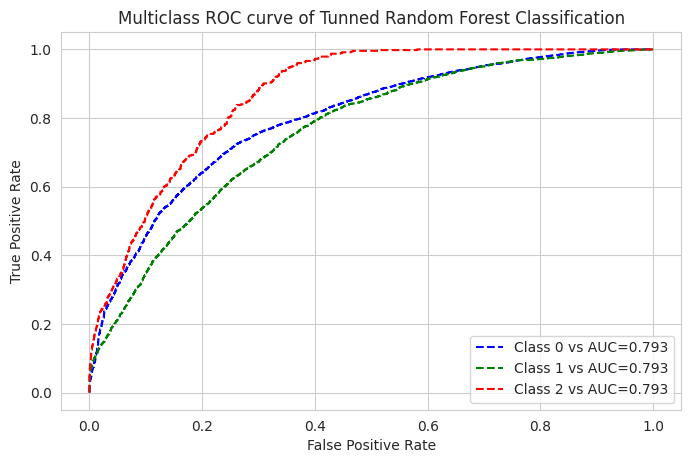

----- ---------------------Evaluation  data of Tunned Random Forest Classification--------------------------------------------
---------------Test data ---------------

Confusion matrix 

[[8896 1270  536]
 [ 998  933  277]
 [ 141  155  179]]
Classification Report 

              precision    recall  f1-score   support

           0       0.89      0.83      0.86     10702
           1       0.40      0.42      0.41      2208
           2       0.18      0.38      0.24       475

    accuracy                           0.75     13385
   macro avg       0.49      0.54      0.50     13385
weighted avg       0.78      0.75      0.76     13385



,Model_Name,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1score,Test_F1score,Train_AUC,Test_AUC
0,Tunned Random Forest Classification,0.897174,0.747703,0.897174,0.747703,0.898035,0.780475,0.895976,0.762077,0.982425,0.79346


In [ ]:
#calling the mdoel evaluation function for Tunned Random Forest Classification model
tunned_random_forest_result = classification_model_evaluation('Tunned Random Forest Classification', rf_grid_model,  x_train_smote, y_train_smote, X_test, Y_test)

tunned_random_forest_result

##**Observation**

by optimizing the hyperparameter its gives better result so far in both train adn test dataset. F1 score in trainig dataset is 0.8959 which more than previousely performed model

##important feature of optimized hyperparameter Random Forest

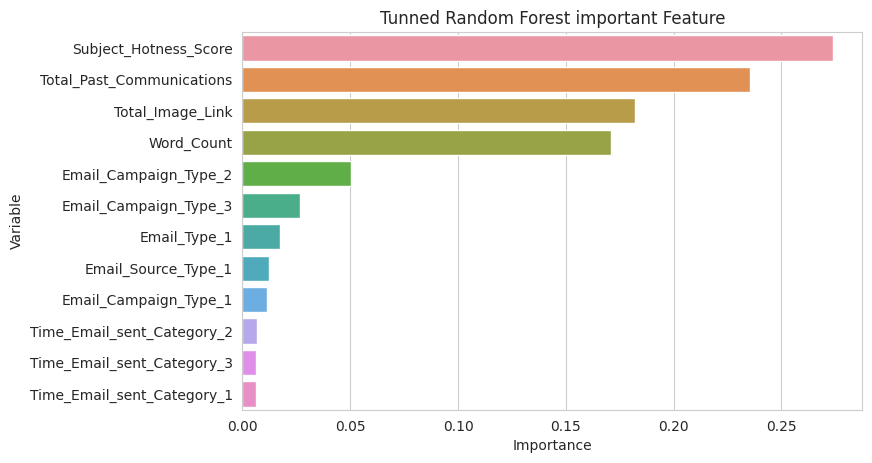

In [ ]:
#calling important feature function for tunned random forest
imporant_feature(rf_grid_model,"Tunned Random Forest important Feature",x_train_smote)

##4.5)XGBoost Classifier

XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. The two reasons to use XGBoost are also the two goals of the project:

1) Execution Speed.

2) Model Performance.

In [ ]:
#fitting smote
#xgb = XGBClassifier(n_estimators=100,max_depth=12,min_samples_leaf=20,min_samples_split=30)
xgb.fit(x_train_smote,y_train_smote)

XGBClassifier(max_depth=12, min_samples_leaf=20, min_samples_split=30,
              objective='multi:softprob')

-------------------------Multiclass ROC curve of XGBoost Classification---------------------------------------


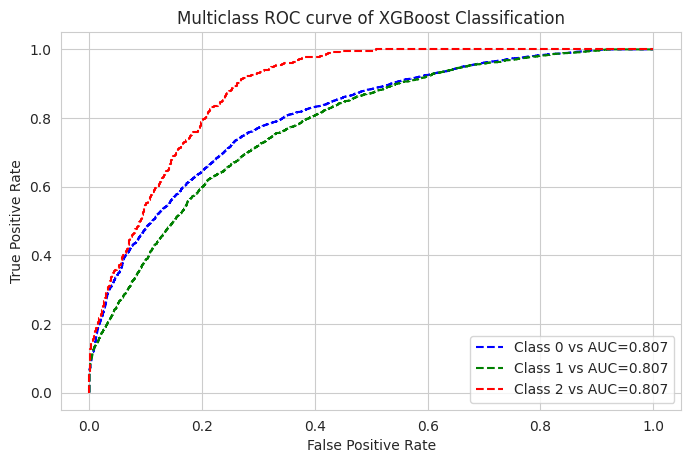

----- ---------------------Evaluation  data of XGBoost Classification--------------------------------------------
---------------Test data ---------------

Confusion matrix 

[[9938  558  206]
 [1411  656  141]
 [ 234  121  120]]
Classification Report 

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     10702
           1       0.49      0.30      0.37      2208
           2       0.26      0.25      0.25       475

    accuracy                           0.80     13385
   macro avg       0.54      0.49      0.51     13385
weighted avg       0.78      0.80      0.78     13385



,Model_Name,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1score,Test_F1score,Train_AUC,Test_AUC
0,XGBoost Classification,0.886545,0.800448,0.886545,0.800448,0.891541,0.776179,0.883277,0.783248,0.976989,0.806564


In [ ]:
#calling the mdoel evaluation function for XGBoost Classification model
xgboost_result = classification_model_evaluation('XGBoost Classification', xgb,  x_train_smote, y_train_smote, X_test, Y_test)
xgboost_result

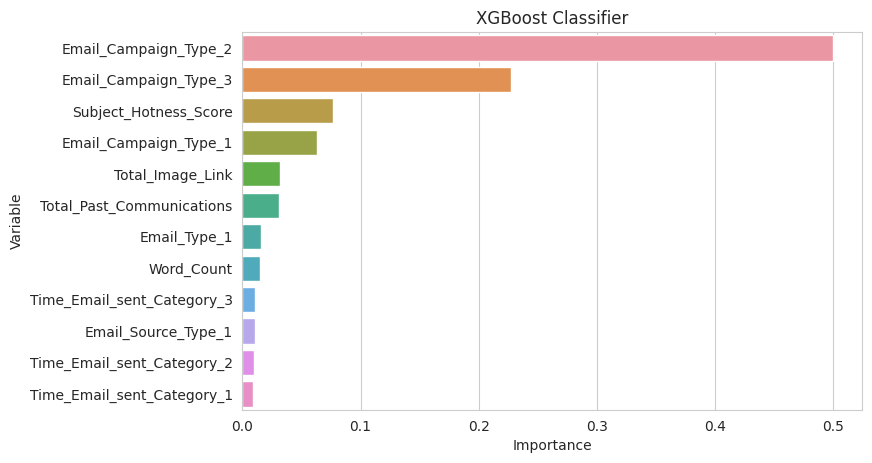

In [ ]:
#calling important feature function for t XGBoost
imporant_feature(xgb,"XGBoost Classifier",x_train_smote)

#**6.Hyterparameter tunned XGBoost Classifiacation**

##6.1. GridSearachCv

In [ ]:
xgb_grid = GridSearchCV(estimator=xgb,
                       param_grid = param_dict_xgb,
                       cv = 3, verbose=2, scoring='f1_weighted')

xgb_grid.fit(x_train_smote,y_train_smote)
print('Train ROC-AUC score : ', xgb_grid.best_estimator_.score(x_train_smote,y_train_smote))
print('Test ROC-AUC score : ', xgb_grid.best_estimator_.score(X_test,Y_test))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=60; total time=   6.5s
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=60; total time=   6.2s
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=60; total time=   8.0s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=  10.8s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=  10.6s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=  10.3s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=140; total time=  15.0s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=140; total time=  14.2s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=140; total time=  21.4s
[CV] END ....learning_rate=0.1, max_depth=6, n_estimators=60; total time=  21.0s
[CV] END ....learning_rate=0.1, max_depth=6, n_estimators=60; total time=  24.2s
[CV] END ....learning_rate=0.1, max_depth=6, n_

In [ ]:
#optimal model
xgb_grid_model = xgb_grid.best_estimator_
xgb_grid_model

XGBClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=30,
              n_estimators=140, objective='multi:softprob')

##6.2. RandomSearachCv

In [ ]:
#Random Search to get the best parameters
xgb_rand=RandomizedSearchCV(estimator=xgb, param_distributions=param_dict_xgb, cv = 5, n_jobs=-1, verbose=2, scoring="f1_weighted")
#Fitting RUS to grid search
xgb_rand.fit(x_train_smote,y_train_smote)
print('Train ROC-AUC score : ', xgb_rand.best_estimator_.score(x_train_smote,y_train_smote))
print('Test ROC-AUC score : ', xgb_rand.best_estimator_.score(X_test,Y_test))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Train ROC-AUC score :  0.8496351842767149
Test ROC-AUC score :  0.8005976839745984


In [ ]:
#optimal model
xgb_rand_model = xgb_rand.best_estimator_
xgb_rand_model

XGBClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=30,
              objective='multi:softprob')

##6.3 BayesSearchCV

In [ ]:
#use bayessearch to get best parameter
xgb_bayes = BayesSearchCV(estimator=xgb,
                       search_spaces = {
                          'max_depth': Integer(4,8),
                          'min_samples_leaf': Integer(10,100),
                          'min_samples_split': Integer(50,150),
                          'n_estimators': Integer(10,100)
                        },
                       cv = 5, verbose=2, scoring='f1_weighted')
#fitting the trainig dataset
xgb_bayes.fit(x_train_smote,y_train_smote)
print('Train ROC-AUC score : ', xgb_bayes.best_estimator_.score(x_train_smote,y_train_smote))
print('Test ROC-AUC score : ', xgb_bayes.best_estimator_.score(X_test,Y_test))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=7, min_samples_leaf=60, min_samples_split=84, n_estimators=95; total time=  36.5s
[CV] END max_depth=7, min_samples_leaf=60, min_samples_split=84, n_estimators=95; total time=  36.0s
[CV] END max_depth=7, min_samples_leaf=60, min_samples_split=84, n_estimators=95; total time=  35.9s
[CV] END max_depth=7, min_samples_leaf=60, min_samples_split=84, n_estimators=95; total time=  35.8s
[CV] END max_depth=7, min_samples_leaf=60, min_samples_split=84, n_estimators=95; total time=  35.7s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=7, min_samples_leaf=66, min_samples_split=60, n_estimators=44; total time=  17.4s
[CV] END max_depth=7, min_samples_leaf=66, min_samples_split=60, n_estimators=44; total time=  17.2s
[CV] END max_depth=7, min_samples_leaf=66, min_samples_split=60, n_estimators=44; total time=  17.0s
[CV] END max_depth=7, min_samples_leaf=66, min_samples_split=60, n_estimat

In [ ]:
#optimal model
xgb_bayes_model = xgb_bayes.best_estimator_
xgb_bayes_model

**For XGBoost classifier, the best estimator so far is given by GridSearchCV.**

##Using tunned hyperparameter optimization parameter with XGBoost model

-------------------------Multiclass ROC curve of Tunned XGBoost Classification---------------------------------------


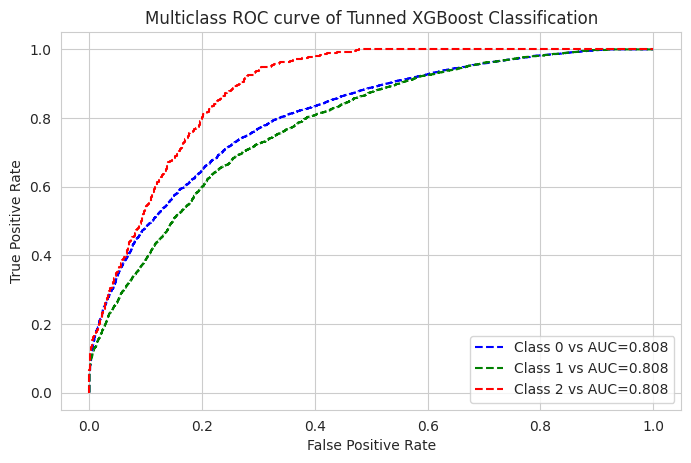

----- ---------------------Evaluation  data of Tunned XGBoost Classification--------------------------------------------
---------------Test data ---------------

Confusion matrix 

[[10048   439   215]
 [ 1458   605   145]
 [  248   114   113]]
Classification Report 

              precision    recall  f1-score   support

           0       0.85      0.94      0.89     10702
           1       0.52      0.27      0.36      2208
           2       0.24      0.24      0.24       475

    accuracy                           0.80     13385
   macro avg       0.54      0.48      0.50     13385
weighted avg       0.78      0.80      0.78     13385



,Model_Name,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1score,Test_F1score,Train_AUC,Test_AUC
0,Tunned XGBoost Classification,0.875947,0.804333,0.875947,0.804333,0.881304,0.778165,0.872075,0.783283,0.97244,0.807664


In [ ]:
#calling the mdoel evaluation function for Tunned XGB Classification model
tuned_xgboost_result = classification_model_evaluation('Tunned XGBoost Classification', xgb_grid_model,  x_train_smote, y_train_smote, X_test, Y_test)
tuned_xgboost_result

##Important feature of optimized hyperparamter XGBoost model

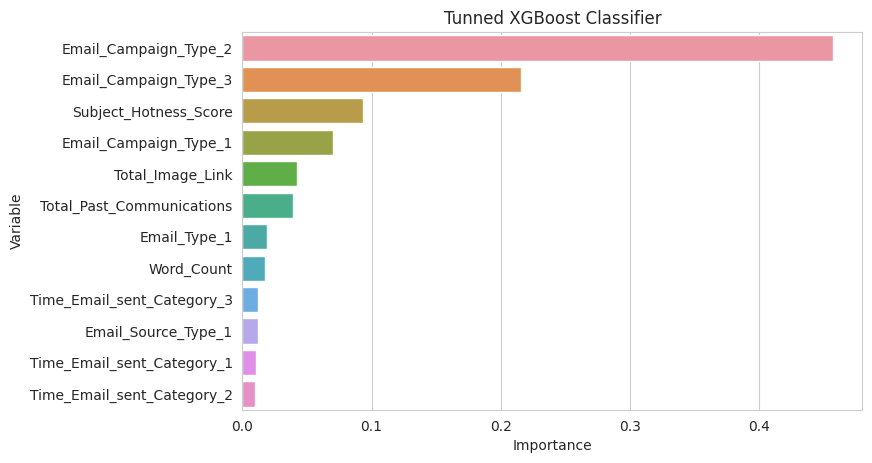

In [ ]:
#calling important feature function for tunned XGBoost
imporant_feature(xgb_grid_model,"Tunned XGBoost Classifier",x_train_smote)

##**Comparison of All Models**

In [ ]:
#collecting the all optimal model
list_of_optimal_model=[logistic_reg_result,decision_tree_result,random_forest_result,tunned_random_forest_result,xgboost_result,tuned_xgboost_result]

In [ ]:
#calling the comparison dataframe function
comparision_model_result=comparison_list(list_of_optimal_model)
comparision_model_result

,Model_Name,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1score,Test_F1score,Train_AUC,Test_AUC
0,Logistic Regression,0.532421,0.590138,0.532421,0.590138,0.527787,0.771300,0.507812,0.656780,0.730397,0.763549
1,Decision Tree,0.999525,0.713485,0.999525,0.713485,0.999525,0.741246,0.999525,0.726067,1.000000,0.626004
2,Random Forest Classification,0.612844,0.647889,0.612844,0.647889,0.650603,0.789522,0.573941,0.697635,0.813269,0.774087
3,Tunned Random Forest Classification,0.897174,0.747703,0.897174,0.747703,0.898035,0.780475,0.895976,0.762077,0.982425,0.793460
4,XGBoost Classification,0.886545,0.800448,0.886545,0.800448,0.891541,0.776179,0.883277,0.783248,0.976989,0.806564
5,Tunned XGBoost Classification,0.875947,0.804333,0.875947,0.804333,0.881304,0.778165,0.872075,0.783283,0.972440,0.807664


In [ ]:
#printing the best model based on F1 score
best_model=comparision_model_result[comparision_model_result["Train_F1score"] < 0.90][:5]
best_model.sort_values(by=["Test_F1score",'Test_AUC'], ascending=(False,False), inplace = True, ignore_index = True)
best_model

,Model_Name,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1score,Test_F1score,Train_AUC,Test_AUC
0,Tunned XGBoost Classification,0.875947,0.804333,0.875947,0.804333,0.881304,0.778165,0.872075,0.783283,0.972440,0.807664
1,XGBoost Classification,0.886545,0.800448,0.886545,0.800448,0.891541,0.776179,0.883277,0.783248,0.976989,0.806564
2,Tunned Random Forest Classification,0.897174,0.747703,0.897174,0.747703,0.898035,0.780475,0.895976,0.762077,0.982425,0.793460
3,Random Forest Classification,0.612844,0.647889,0.612844,0.647889,0.650603,0.789522,0.573941,0.697635,0.813269,0.774087
4,Logistic Regression,0.532421,0.590138,0.532421,0.590138,0.527787,0.771300,0.507812,0.656780,0.730397,0.763549


#**Summary of all model comparison**

#**Evaluation Metrics:**

There is a number of model evaluation metrics to choose from but since our dataset was highly imbalanced, it is critical to understand which metric should be evaluated to understand the model performance.

**Accuracy**- Accuracy simply measures how often the classifier correctly predicts. We can define accuracy as the ratio of the number of correct predictions and the total number of predictions. Accuracy is useful when the target class is well balanced but is not a good choice for the unbalanced classes, because if the model poorly predicts every observation as of the majority class, we are going to get a pretty high accuracy.

**Confusion Matrix** - It is a performance measurement criteria for the machine learning classification problems where we get a table with a combination of predicted and actual values.

**Precision** - Precision for a label is defined as the number of true positives divided by the number of predicted positives.

**Recall** - Recall for a label is defined as the number of true positives divided by the total number of actual positives. Recall explains how many of the actual positive cases we were able to predict correctly with our model.

**F1 Score** - It's actually the harmonic mean of Precision and Recall. It is maximum when Precision is equal to Recall.

**AUC ROC** - The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes. When AUC is 0.5, the classifier is not able to distinguish between the classes and when it's closer to 1,the more good it becomes in distingushing them.

So among all the above metrics, which metric should be prioritised in comparing the performance of our various models? That's the major question here as we have a multiclass classification problem, where the problem statement just asks us to track and classify between ignored, read and acknowledged classes, we can not decide here what we want to prioritise in terms of classification, we just want to correctly classify and characterize accordingly. On top of that our data is highly imbalanced, which we tried to encounter in the ways possible.

When we have a high class imbalance, we'll choose the F1 score because a high F1 score considers both precision and recall. To get a high F1, both false positives and false negatives must be low. The F1 score depends on how highly imbalanced our dataset is!

##Lets Visualising the F1 score of all model

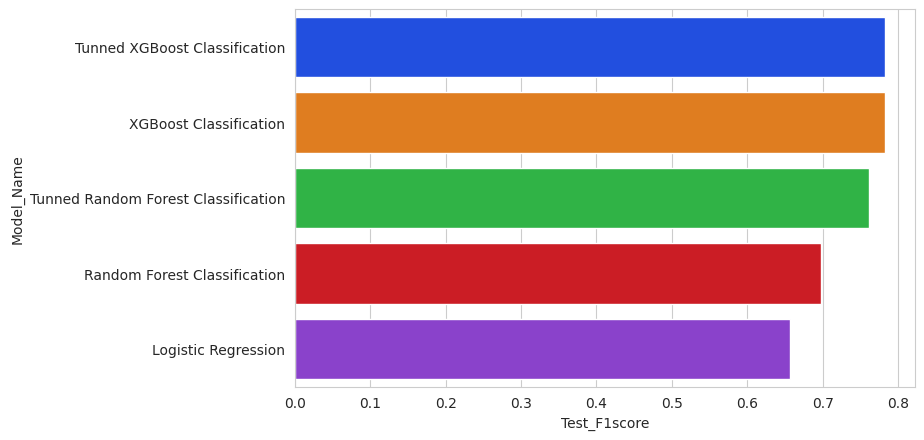

In [ ]:
#visualising our comparison df for f1 score
sns.barplot(y=best_model['Model_Name'], x = best_model['Test_F1score'])

##Lets Visualising the AUC of all model

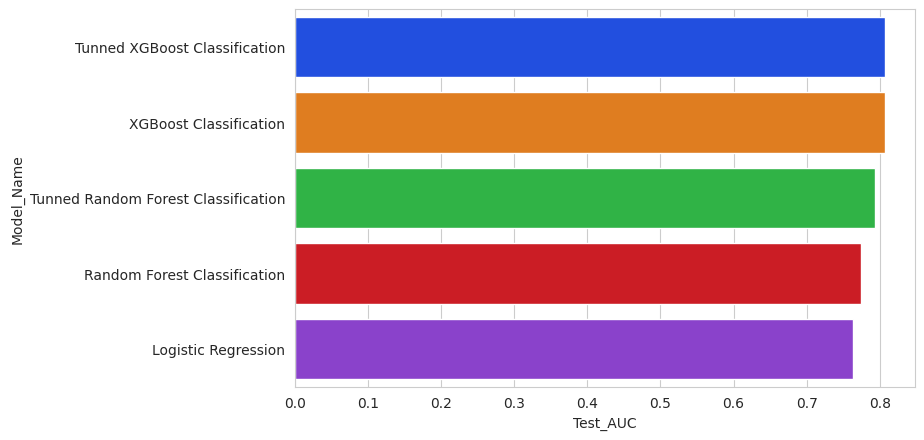

In [ ]:
#visualising for auc
sns.barplot(y=best_model['Model_Name'], x = best_model['Test_AUC'])

##**Conclusion**

from both F1 score and AUC score we can conclude that best model of Tunned Random forest followed by XGBoost and Tunned XGBoost.

#5)Model Explainibility

##SHAP

In [ ]:

pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 9.7 MB/s 


In [ ]:
from sklearn.tree import export_graphviz
import shap 
sns.set_style('darkgrid')

#1) XG Boosting Explainability

In [ ]:
#calling treeExplainer for model explainability 
explainer_train = shap.TreeExplainer(xgb_grid_model)
shap_values_train = explainer_train.shap_values(x_train_smote,check_additivity=False)

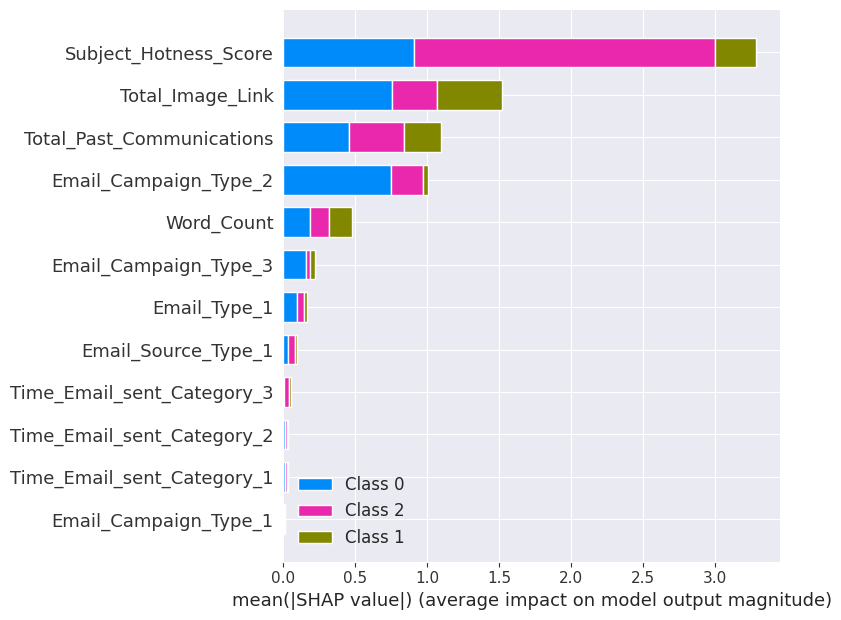

In [ ]:
#plotting summary plot with help of shap value
shap.summary_plot(shap_values_train,x_train_smote,plot_type='bar')

##**Conclusion**

Class 2 gives more shap value when subject hotness score , total image link, total past communication are more than mean value shap.receiving of mail with respect to time is not an impact to any class label. but actual XGBoost model shows there is need some caution in these features.

calss 0 label gives less shap value than class 2 and read mails are mostly depends on features that why shap value is more

**==============================================================================================================**





#**Dataset Summary**

#**Modeling**


1)After the train-test split, just the training data was used for Imbalanced Class Handling techniques like  SMOTE to ensure that the model didn't catch up to the test set at all and that it remained unknown, which slightly lowered our results.

2)In general random under sampling gives better result than smote. Here SMOTE was found to perform significantly better



3)Overfitting of the decision tree model. It performs far worse on test data than it does on train data.



4)The results aren't being much enhanced by adjusting the hyperparameters.



5)XGBoost alogorithm  work well in test dataset with F1 score is 0.7896 but tuned random forest gives better result for training dataset with F1score of 0.898

6) Maximum value  both F1 score and AUC score gives optimized hyperparameter random boost model and consider as good model performance based on given dataset.  

#**Recommendations**

1)We came to a conclusion and listed several elements that are causing a higher number of ignored emails based on this extensive exploratory data analysis and feature importance of various good models. Accordingly, here are some recommendations.

2)Types 2 and 3 of email campaigns perform better than Type 1 do. Therefore, concentrating on improving 2 may be effective.

3)The word count ought to be appropriate. A few marketing tricks should be used, but the material should be concise and to the point.

4)The quantity of images and links must be moderated.

5)Having a good relationship with customers is definitely a yes, as the overall impact of previous contacts was favourable.